Allen Hoskins 

DS7337: Natural Language Processing, Fall 2022

# <center> <u>Homework 8</u>

***
Perform a vocabulary-based sentiment analysis of the movie reviews you used in homework 5 and homework 7, by doing the following:

## 1.
###	In Python, load one of the sentiment vocabularies referenced in the textbook, and run the sentiment analyzer as explained in the corresponding reference. Add words to the sentiment vocabulary, if you think you need to, to better fit your particular text collection.

In [93]:
import pandas as pd
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob


nlp = spacy.load('en_core_web_sm')
nlp.add_pipe("spacytextblob")


In [94]:
df['sentiment_score'] =  df['reviews'].apply(lambda x: nlp(x)._.polarity)
df['subjectivity'] = df['reviews'].apply(lambda x: nlp(x)._.subjectivity)
df['sentiment_assessments'] = df['reviews'].apply(lambda x: nlp(x)._.blob.sentiment_assessments.assessments)

In [86]:
df['sentiment_score_str'] = np.where(df['sentiment_score'] > 0,'Positive','Negative')
df['subjectivity_str'] = np.where(df['subjectivity']>=0.5,'Subjective','Objective' )

In [87]:
df.head()

,cluster,permalinks,reviews,sentiment_score,subjectivity,sentiment_assessments,sentiment_score_str,subjectivity_str
0,4,https://www.imdb.com/review/rw8310329/,Thor: Love and Thunder does attempt to explore...,0.134251,0.583404,"[([love], 0.5, 0.6, None), ([love], 0.5, 0.6, ...",Positive,Subjective
1,17,https://www.imdb.com/review/rw8309971/,"Christian Bale is great, Russell Crowe has a g...",0.062500,0.689583,"[([christian], 0.0, 0.0, None), ([great], 0.8,...",Positive,Subjective
2,1,https://www.imdb.com/review/rw8351608/,"I'm a huge marvel fanboy, and hardly ever have...",0.047500,0.654444,"[([huge], 0.4000000000000001, 0.9, None), ([ha...",Positive,Subjective
3,0,https://www.imdb.com/review/rw8334081/,"Fine seems to cover it, Disney has become fine...",0.210000,0.400000,"[([fine], 0.4166666666666667, 0.5, None), ([fi...",Positive,Objective
4,2,https://www.imdb.com/review/rw8315692/,"Movie is okay. Christian Bale is awesome, Chri...",0.135000,0.647500,"[([okay], 0.5, 0.5, None), ([christian], 0.0, ...",Positive,Subjective


## 2.
### For each of the clusters you created in homework 7, compute the average, median, high, and low sentiment scores for each cluster. Explain whether you think this reveals anything interesting about the clusters.
> The resulting Mean, median, max and min scores for each cluser do not vary wildy from 0. While there are three clusters (4,5,12) that are further away from 0, most clusters are close to 0 and the reviews are subjective to the author. This could mean that while there are positive and negative aspects in each review, the overall score averages out to be a "mixed" review. 

In [92]:
clusters = list(df.cluster.unique())
clusters.sort()

score_df = pd.DataFrame(columns=['Cluster','Mean_Score','Median_Score','Max_Score','Min_Score'])

for clust in clusters:
    mean = df.loc[df['cluster'] == clust,'sentiment_score'].mean().round(3)
    median = df.loc[df['cluster'] == clust,'sentiment_score'].median().round(3)
    max_score = df.loc[df['cluster'] == clust,'sentiment_score'].max().round(3)
    min_score = df.loc[df['cluster'] == clust,'sentiment_score'].min().round(3)
    dict = {
            'Cluster':f'{clust}',
            'Mean_Score':f'{mean}',
            'Median_Score': f'{median}',
            'Max_Score': f'{max_score}',
            'Min_Score':f'{min_score}'
            }
    _df = pd.DataFrame([dict])
    score_df = pd.concat([score_df,_df],axis=0).reset_index(drop=True)

score_df


,Cluster,Mean_Score,Median_Score,Max_Score,Min_Score
0,0,0.005,0.005,0.21,-0.2
1,1,0.165,0.14,0.471,-0.029
2,2,0.087,0.11,0.304,-0.4
3,3,0.345,0.345,0.448,0.242
4,4,0.018,0.136,0.283,-0.612
5,5,0.567,0.567,0.567,0.567
6,6,0.131,0.132,0.358,-0.24
7,7,0.125,0.125,0.125,0.125
8,8,0.36,0.36,0.36,0.36
9,9,0.176,0.182,0.526,-0.294


***
***

### Homework 7 Data
RUN BELOW CODE BEFORE ABOVE
### Cells Hidden 



In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.chunk import RegexpParser
import requests
from bs4 import BeautifulSoup as bs
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import numpy as np
from bs4 import BeautifulSoup

In [76]:
def return_permalinks(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    a_tags = soup.find_all("a")
    permalinks = []
    for tag in a_tags:
        if tag.get_text() == "Permalink":
            permalink = "https://www.imdb.com" + tag.attrs['href']
            permalinks.append(permalink)
    return permalinks

def return_all_permalinks(dict):
    all_permalinks = []
    for movie_name, review_page_link in dict.items():
        permalinks = return_permalinks(url=review_page_link)
        all_permalinks += permalinks
        title = ' '.join(movie_name.split("_")).title()
    return all_permalinks

In [77]:
review_pages = {'thor:_love_and_thunder':"https://www.imdb.com/title/tt10648342/reviews/?ref_=tt_ql_urv", 
                "the_lost_city":"https://www.imdb.com/title/tt13320622/reviews/?ref_=tt_ql_urv", 
                "deadpool_2":"https://www.imdb.com/title/tt5463162/reviews/?ref_=tt_ql_urv", 
                "deadpool":"https://www.imdb.com/title/tt1431045/reviews/?ref_=tt_ql_urv", 
                "land_of_the_lost":"https://www.imdb.com/title/tt0457400/reviews/?ref_=tt_ql_urv", 
                "free_guy":"https://www.imdb.com/title/tt6264654/reviews/?ref_=tt_ql_urv", 
                "the_suicide_squad":"https://www.imdb.com/title/tt6334354/reviews/?ref_=tt_ql_urv",
                "guardians_of_the_galaxy":"https://www.imdb.com/title/tt2015381/reviews/?ref_=tt_ql_urv"}

plinks = return_all_permalinks(dict=review_pages)

In [78]:

def get_reviews(link):
    response = requests.get(link)
    soup = BeautifulSoup(response.content, "html.parser")
    review_texts = []
    for s in soup.find_all('script'):
        if s.has_attr('type'):
            if s.attrs['type'] == "application/ld+json":
                tag_json = json.loads(s.get_text())
                if "reviewBody" in tag_json.keys():
                    body = tag_json['reviewBody']
                    review_texts.append(body)
    return review_texts

In [79]:
reviews = [get_reviews(link=url) for url in plinks]
texts = [txt[0] for txt in reviews if len(txt) != 0]

In [80]:
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(texts)

In [81]:

### Using K == 18
true_k = 18
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_

In [82]:
df = pd.DataFrame(list(zip(labels, plinks, texts)), columns=['cluster', 'permalinks','reviews'])
df.sort_values(by='cluster')

,cluster,permalinks,reviews
3,0,https://www.imdb.com/review/rw8334081/,"Fine seems to cover it, Disney has become fine..."
132,0,https://www.imdb.com/review/rw7386465/,From the opening scene onwards the film is inc...
149,1,https://www.imdb.com/review/rw7636810/,Guardians of the Galaxy is nothing short of an...
34,1,https://www.imdb.com/review/rw8003034/,The amazing thing about this film -- despite t...
35,1,https://www.imdb.com/review/rw8000197/,Got to see the early ish screening considered ...
...,...,...,...
45,16,https://www.imdb.com/review/rw8010549/,"Not as good as the first one, however it still..."
107,16,https://www.imdb.com/review/rw2085350/,"Shawn Levy's Academy Award-nominated ""Free Guy..."
103,16,https://www.imdb.com/review/rw6124126/,"For the first 20 or so minutes of ""Free Guy"" I..."
125,17,https://www.imdb.com/review/rw7264188/,"Before you think ""Yea. We know. It's stupid. T..."


Cluster: 0
IMDB Review Links
https://www.imdb.com/review/rw8334081/
https://www.imdb.com/review/rw7386465/
IMDB Review Texts


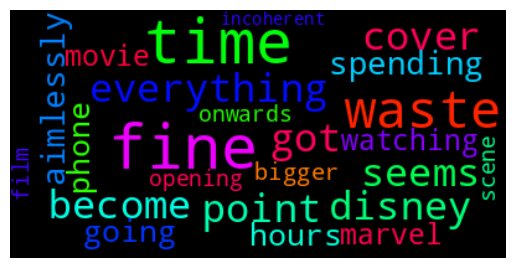

Cluster: 1
IMDB Review Links
https://www.imdb.com/review/rw8351608/
https://www.imdb.com/review/rw8307205/
https://www.imdb.com/review/rw8003034/
https://www.imdb.com/review/rw8000197/
https://www.imdb.com/review/rw8074452/
https://www.imdb.com/review/rw4173508/
https://www.imdb.com/review/rw3586681/
https://www.imdb.com/review/rw5084366/
https://www.imdb.com/review/rw2252940/
https://www.imdb.com/review/rw4009143/
https://www.imdb.com/review/rw6720554/
https://www.imdb.com/review/rw7230233/
https://www.imdb.com/review/rw7399273/
https://www.imdb.com/review/rw7237213/
https://www.imdb.com/review/rw7636810/
https://www.imdb.com/review/rw7562236/
IMDB Review Texts


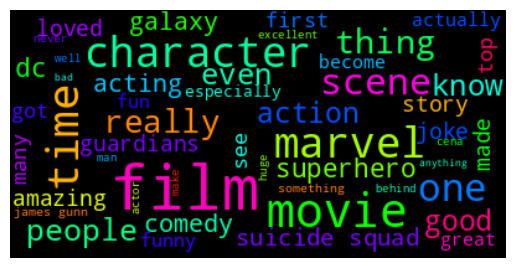

Cluster: 2
IMDB Review Links
https://www.imdb.com/review/rw8315692/
https://www.imdb.com/review/rw8313711/
https://www.imdb.com/review/rw8306334/
https://www.imdb.com/review/rw4602468/
https://www.imdb.com/review/rw6454784/
https://www.imdb.com/review/rw6570383/
https://www.imdb.com/review/rw8314382/
https://www.imdb.com/review/rw4184836/
https://www.imdb.com/review/rw7736031/
https://www.imdb.com/review/rw3598955/
https://www.imdb.com/review/rw5188355/
https://www.imdb.com/review/rw3551439/
https://www.imdb.com/review/rw3564194/
https://www.imdb.com/review/rw7098080/
https://www.imdb.com/review/rw3416540/
https://www.imdb.com/review/rw5346447/
https://www.imdb.com/review/rw3308901/
https://www.imdb.com/review/rw2076025/
https://www.imdb.com/review/rw2076741/
https://www.imdb.com/review/rw3018750/
https://www.imdb.com/review/rw7219673/
https://www.imdb.com/review/rw7861137/
https://www.imdb.com/review/rw7226928/
https://www.imdb.com/review/rw7997819/
https://www.imdb.com/review/rw75475

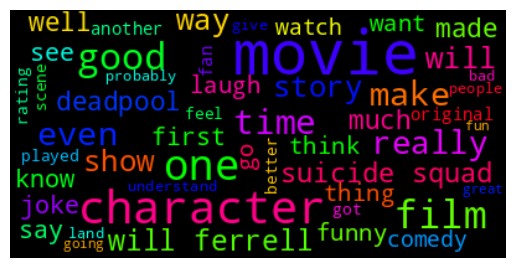

Cluster: 3
IMDB Review Links
https://www.imdb.com/review/rw7336440/
https://www.imdb.com/review/rw7174916/
IMDB Review Texts


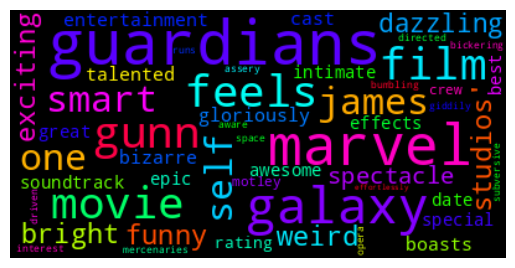

Cluster: 4
IMDB Review Links
https://www.imdb.com/review/rw8310329/
https://www.imdb.com/review/rw8313357/
https://www.imdb.com/review/rw8323305/
https://www.imdb.com/review/rw8315634/
https://www.imdb.com/review/rw8311620/
https://www.imdb.com/review/rw8331400/
IMDB Review Texts


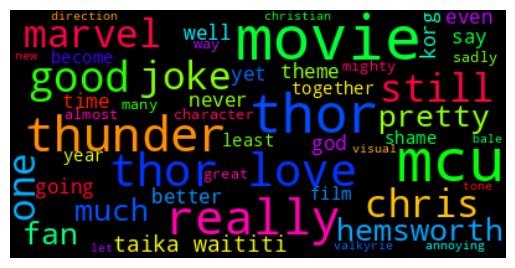

Cluster: 5
IMDB Review Links
https://www.imdb.com/review/rw8147816/
IMDB Review Texts


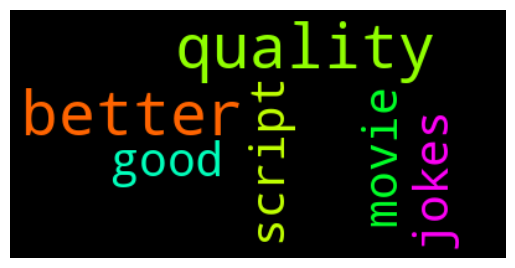

Cluster: 6
IMDB Review Links
https://www.imdb.com/review/rw8314433/
https://www.imdb.com/review/rw8525634/
https://www.imdb.com/review/rw8312037/
https://www.imdb.com/review/rw8524888/
https://www.imdb.com/review/rw8312102/
https://www.imdb.com/review/rw8304711/
https://www.imdb.com/review/rw7999344/
https://www.imdb.com/review/rw8004095/
https://www.imdb.com/review/rw8608885/
https://www.imdb.com/review/rw8580474/
https://www.imdb.com/review/rw8004578/
https://www.imdb.com/review/rw8002890/
https://www.imdb.com/review/rw8136044/
https://www.imdb.com/review/rw8136345/
https://www.imdb.com/review/rw8091699/
https://www.imdb.com/review/rw8007627/
https://www.imdb.com/review/rw8014072/
https://www.imdb.com/review/rw8136793/
https://www.imdb.com/review/rw8138680/
https://www.imdb.com/review/rw6923557/
https://www.imdb.com/review/rw6820154/
https://www.imdb.com/review/rw3727595/
https://www.imdb.com/review/rw3740393/
https://www.imdb.com/review/rw2702243/
https://www.imdb.com/review/rw72335

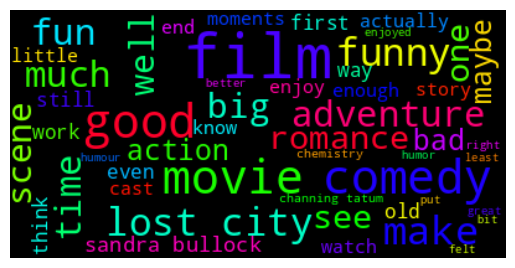

Cluster: 7
IMDB Review Links
https://www.imdb.com/review/rw7292882/
IMDB Review Texts


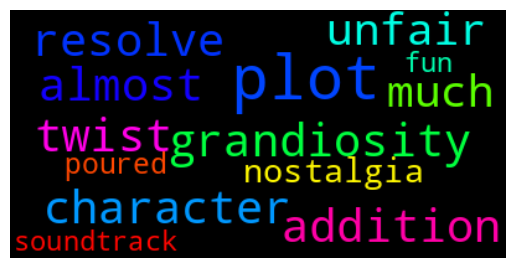

Cluster: 8
IMDB Review Links
https://www.imdb.com/review/rw7218212/
IMDB Review Texts


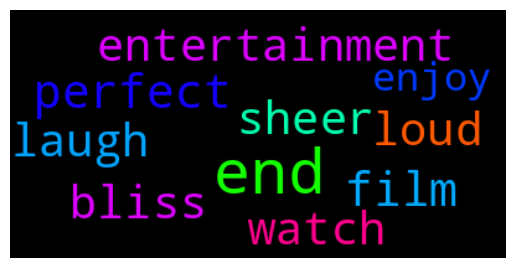

Cluster: 9
IMDB Review Links
https://www.imdb.com/review/rw8329077/
https://www.imdb.com/review/rw8009712/
https://www.imdb.com/review/rw8221725/
https://www.imdb.com/review/rw8146008/
https://www.imdb.com/review/rw8093742/
https://www.imdb.com/review/rw5733933/
https://www.imdb.com/review/rw7293764/
https://www.imdb.com/review/rw4695639/
https://www.imdb.com/review/rw5984758/
https://www.imdb.com/review/rw4300927/
https://www.imdb.com/review/rw4297422/
https://www.imdb.com/review/rw6981276/
https://www.imdb.com/review/rw4379195/
https://www.imdb.com/review/rw4174623/
https://www.imdb.com/review/rw7323151/
https://www.imdb.com/review/rw6971097/
https://www.imdb.com/review/rw4209571/
https://www.imdb.com/review/rw4161726/
https://www.imdb.com/review/rw4182610/
https://www.imdb.com/review/rw5848872/
https://www.imdb.com/review/rw5314095/
https://www.imdb.com/review/rw4150748/
https://www.imdb.com/review/rw3415632/
https://www.imdb.com/review/rw3708156/
https://www.imdb.com/review/rw20781

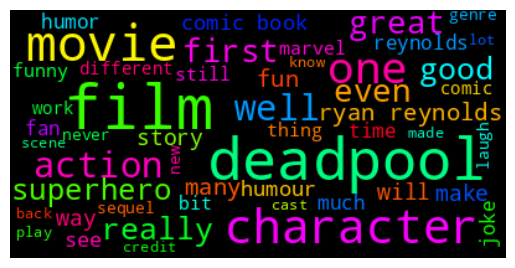

Cluster: 10
IMDB Review Links
https://www.imdb.com/review/rw7262327/
https://www.imdb.com/review/rw7230542/
https://www.imdb.com/review/rw7207923/
IMDB Review Texts


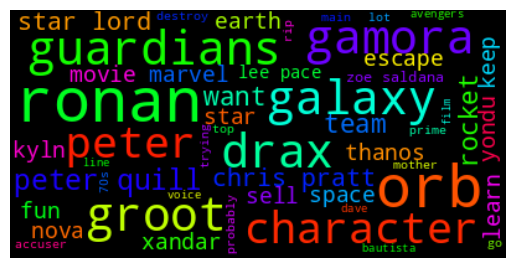

Cluster: 11
IMDB Review Links
https://www.imdb.com/review/rw8318859/
https://www.imdb.com/review/rw8310746/
https://www.imdb.com/review/rw8304194/
https://www.imdb.com/review/rw8311274/
https://www.imdb.com/review/rw8153642/
https://www.imdb.com/review/rw6118931/
https://www.imdb.com/review/rw3413536/
https://www.imdb.com/review/rw3756090/
https://www.imdb.com/review/rw7293763/
https://www.imdb.com/review/rw3595803/
https://www.imdb.com/review/rw5839124/
https://www.imdb.com/review/rw3410774/
https://www.imdb.com/review/rw3414913/
https://www.imdb.com/review/rw3415728/
https://www.imdb.com/review/rw4064836/
https://www.imdb.com/review/rw2076017/
https://www.imdb.com/review/rw2260646/
https://www.imdb.com/review/rw2078749/
https://www.imdb.com/review/rw7235565/
https://www.imdb.com/review/rw7240092/
https://www.imdb.com/review/rw7898908/
https://www.imdb.com/review/rw7400811/
https://www.imdb.com/review/rw7558618/
https://www.imdb.com/review/rw7248676/
https://www.imdb.com/review/rw8011

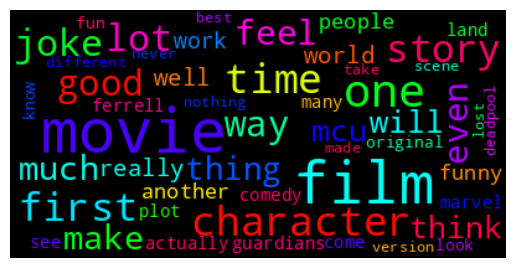

Cluster: 12
IMDB Review Links
https://www.imdb.com/review/rw7227994/
IMDB Review Texts


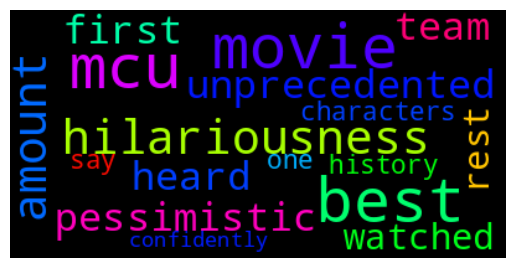

Cluster: 13
IMDB Review Links
https://www.imdb.com/review/rw2715924/
IMDB Review Texts


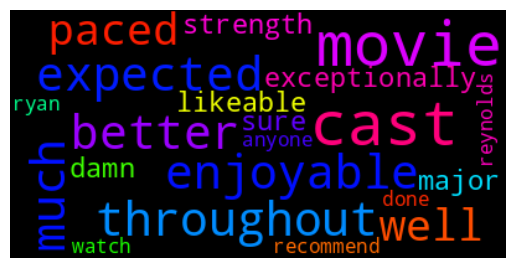

Cluster: 14
IMDB Review Links
https://www.imdb.com/review/rw2079109/
IMDB Review Texts


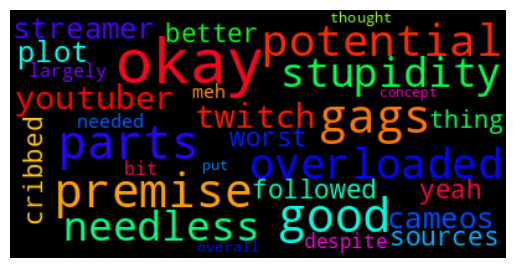

Cluster: 15
IMDB Review Links
https://www.imdb.com/review/rw8332897/
https://www.imdb.com/review/rw7999963/
https://www.imdb.com/review/rw4855093/
https://www.imdb.com/review/rw3411582/
https://www.imdb.com/review/rw3419493/
https://www.imdb.com/review/rw2077072/
IMDB Review Texts


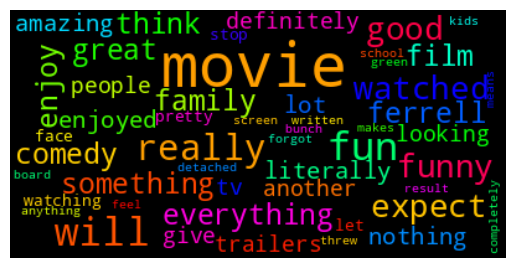

Cluster: 16
IMDB Review Links
https://www.imdb.com/review/rw8093318/
https://www.imdb.com/review/rw8010549/
https://www.imdb.com/review/rw5418679/
https://www.imdb.com/review/rw2079935/
https://www.imdb.com/review/rw6124126/
https://www.imdb.com/review/rw2864656/
https://www.imdb.com/review/rw2677074/
https://www.imdb.com/review/rw2085350/
https://www.imdb.com/review/rw7208841/
IMDB Review Texts


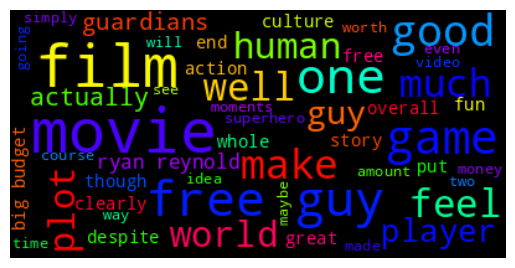

Cluster: 17
IMDB Review Links
https://www.imdb.com/review/rw8309971/
https://www.imdb.com/review/rw7264188/
IMDB Review Texts


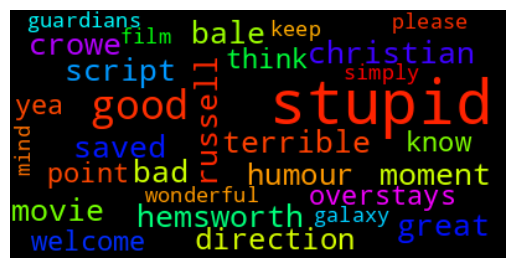

In [83]:
for k in range(0,true_k):
    s=df[df.cluster==k]
    text=s['reviews'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=50,colormap='hsv').generate(text)
    print('Cluster: {}'.format(k))
    print('IMDB Review Links')
    revs=df[df.cluster==k]['permalinks']
    print(revs.to_string(index=False))
    print('IMDB Review Texts')
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()